# Accessing real estate data and prep it for analysis and predictions


1. access the files in the directory and opening them as pandas
2. concatenating all the files in one pandas dataframe
3. dataframe manipulation
   
    __a. drop columns__
    
    columns = ['Unnamed: 0', 'DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS','NEWPROJECTTEXT','PROJECTNAME','YEARBUILT','KEYVALUE', 'TYPE', 
'POLYGON_ID', 'TREND_IS_NEGATIVE', 'TREND_FORMAT'])
    
    __b. rename columns__
    
    nadlan_rehovot.columns = ['gush_helka', 'description', 'room number', 'floor',
       'surface area', 'price', 'building year', 'total floor in building' ]
    
    __c. split adress and get gush number__
    
    nadlan_rehovot[['gush_number', 'helka1','helka2']] = nadlan_rehovot['gush_helka'].str.split('-', expand=True)
    nadlan_rehovot.drop(columns = ['helka1','helka2', 'gush_helka'], inplace=True)
   
   __d.price as integer__
   
    nadlan_rehovot['price'] = nadlan_rehovot['price'].str.replace(',', '')
    nadlan_rehovot.astype(int, copy=False, errors='ignore')
    nadlan_rehovot['price'] = nadlan_rehovot['price'].astype(int)
    
    __e. building date to 'old' or 'new'__
    
    if date <2000 then the building is 'old'
    if date >= 2000 then the building is 'new'
    
    __f. asset description__
    
        {'בניני ציבור': 'public building',
     'דירה':'appartment',
     'דירה בבית קומות':'appartment',
     'דירת גג':'roof top appartment',
     'דירת גג (פנטהאוז)':'roof top appartment',
     'דירת גן':'garden appartment',
     'חנות':'shop',
     'לא מעובדת':'unknown',
     'ללא תיכנון':'unknown',
     'מחסנים':'unknown',
     'מיני פנטהאוז':'roof top appartment',
     'מלאכה':'unknown',
     'מסחרי + משרדים':'offices',
     'משרד':'offices',
     'משרדים + מגורים':'offices',
     "קוטג' דו משפחתי":'double ground house',
     "קוטג' חד משפחתי":'single ground house',
     "קוטג' טורי":'unknown',
     'קרקע למגורים':'unknown'}
     
     __g. Remove extreme value__
     
     keep only surface area < 300 m2 and price < 4000000
     nadlan_rehovot = nadlan_rehovot.loc[nadlan_rehovot['surface area']<300]
     nadlan_rehovot = nadlan_rehovot.loc[nadlan_rehovot['price']<4000000]

    __h. Surface area to groups__
    
    'up to 50m2'
    'between 50 and 100m2'
    'between 100 and 150m2'
    'between 150 and 200m2'
    'more than 200 m2'
    'unknown'


In [2]:
import pandas as pd
import numpy as np
import requests
import json
import math
import seaborn as sns
from matplotlib import pyplot as plt
import time
import glob
from pathlib import Path

In [2]:
# country_deals = pd.DataFrame(columns = ['index', 'DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
#        'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
#        'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
#        'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
#        'TREND_IS_NEGATIVE', 'TREND_FORMAT'])
# path1 = r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\city and real estate deals\ASHDOD.csv'
# path2 = r"C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\city and real estate deals\ARI'EL.csv"
# ashdod = pd.read_csv(path1,names=['DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
#        'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
#        'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
#        'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
#        'TREND_IS_NEGATIVE', 'TREND_FORMAT'] )
# country_deals = pd.concat([country_deals, ashdod], ignore_index=True)
# ariel = pd.read_csv(path2,names=['DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
#        'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
#        'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
#        'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
#        'TREND_IS_NEGATIVE', 'TREND_FORMAT'] )

# country_deals = pd.concat([country_deals, ariel], ignore_index=True)
# country_deals

In [3]:
country_deals = pd.DataFrame(columns = ['index', 'DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
       'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
       'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
       'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
       'TREND_IS_NEGATIVE', 'TREND_FORMAT'])
n = 0
for files in glob.glob(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\city and real estate deals\*.csv'):
    n+=1
    print(n)
#     print(files)
    path = Path(files)
    name = path.name.strip('.csv').replace(" ", "_").replace("'", "")
    try:
        name = pd.read_csv(files, names=['DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS', 'GUSH',
       'DEALNATUREDESCRIPTION', 'ASSETROOMNUM', 'FLOORNO', 'DEALNATURE',
       'DEALAMOUNT', 'NEWPROJECTTEXT', 'PROJECTNAME', 'BUILDINGYEAR',
       'YEARBUILT', 'BUILDINGFLOORS', 'KEYVALUE', 'TYPE', 'POLYGON_ID',
       'TREND_IS_NEGATIVE', 'TREND_FORMAT'])
#         country_deals.append(name)
        country_deals = pd.concat([country_deals, name], ignore_index=True)
    except Exception as e:
        print(e, name)
country_deals
country_deals.to_pickle(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\ALLnadlan_data.pkl') 


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [46]:
country_deals = pd.read_pickle(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\ALLnadlan_data.pkl')
country_deals

,index,DEALDATE,DEALDATETIME,FULLADRESS,DISPLAYADRESS,GUSH,DEALNATUREDESCRIPTION,ASSETROOMNUM,FLOORNO,DEALNATURE,...,NEWPROJECTTEXT,PROJECTNAME,BUILDINGYEAR,YEARBUILT,BUILDINGFLOORS,KEYVALUE,TYPE,POLYGON_ID,TREND_IS_NEGATIVE,TREND_FORMAT
0,NaN,19.07.2019,2019-07-19T00:00:00,NaN,NaN,19688-70-1,מלונאות,NaN,NaN,1877,...,NaN,NaN,1980,NaN,NaN,4768984960,2,19688-70,False,NaN
1,NaN,20.03.2018,2018-03-20T00:00:00,NaN,NaN,19688-53-1,מלונאות,NaN,ראשונה,70,...,NaN,NaN,2001,NaN,NaN,4723245600,2,19688-53,False,NaN
2,NaN,06.12.2016,2016-12-06T00:00:00,NaN,NaN,19688-41-1,דירה בבית קומות,1.0,ראשונה,45,...,NaN,NaN,2003,NaN,NaN,4680955800,2,19688-41,False,NaN
3,NaN,01.09.2015,2015-09-01T00:00:00,NaN,NaN,19688-73-1,מלונאות,NaN,ראשונה,75,...,NaN,NaN,2002,NaN,NaN,4609900480,2,19688-73,False,NaN
4,NaN,18.07.2010,2010-07-18T00:00:00,", אבירים",,19688-77-1,מלונאות,NaN,NaN,307,...,NaN,NaN,1986,NaN,NaN,4407230360,1,19688-77,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238235,NaN,08.06.2010,2010-06-08T00:00:00,NaN,NaN,19255-39-1,קוטג' חד משפחתי,6.0,NaN,130,...,NaN,NaN,1998,NaN,NaN,4405179000,2,19255-39,False,NaN
238236,NaN,30.01.2008,2008-01-30T00:00:00,", צביה",,19255-49-1,דירה בבית קומות,4.0,ראשונה,127,...,NaN,NaN,1998,NaN,NaN,4322916760,1,19255-49,False,NaN
238237,NaN,11.01.2008,2008-01-11T00:00:00,", צביה",,19255-73-1,בית בודד,4.0,NaN,76,...,NaN,NaN,1992,NaN,NaN,4320798040,1,19255-73,False,NaN
238238,NaN,20.12.2007,2007-12-20T00:00:00,", צביה",,19255-79-1,בית בודד,4.0,NaN,105,...,NaN,NaN,1997,NaN,NaN,4320376320,1,19255-79,False,NaN


Retrieve the year the house was bought

In [47]:
country_deals.drop_duplicates(ignore_index=True, inplace=True)
country_deals.shape

(236819, 21)

In [48]:
country_deals[['day', 'month', 'deal_year']] = country_deals['DEALDATE'].str.split('.', expand=True)
country_deals['deal_year'] = country_deals['deal_year'].astype(int)
country_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236819 entries, 0 to 236818
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  0 non-null       object 
 1   DEALDATE               236819 non-null  object 
 2   DEALDATETIME           236819 non-null  object 
 3   FULLADRESS             163935 non-null  object 
 4   DISPLAYADRESS          163935 non-null  object 
 5   GUSH                   236819 non-null  object 
 6   DEALNATUREDESCRIPTION  236472 non-null  object 
 7   ASSETROOMNUM           219517 non-null  float64
 8   FLOORNO                184158 non-null  object 
 9   DEALNATURE             233774 non-null  object 
 10  DEALAMOUNT             236819 non-null  object 
 11  NEWPROJECTTEXT         43801 non-null   float64
 12  PROJECTNAME            35899 non-null   object 
 13  BUILDINGYEAR           214871 non-null  object 
 14  YEARBUILT              3411 non-null

a-b. drop and rename columns

In [49]:
# country_deals = pd.read_csv(r'C:\Users\majac\Desktop\JohnBriceProject\RealEstateData\test5.csv')
country_deals.drop(columns = ['index', 'DEALDATE', 'DEALDATETIME', 'FULLADRESS', 'DISPLAYADRESS','NEWPROJECTTEXT', 'PROJECTNAME','YEARBUILT','KEYVALUE', 'TYPE',
       'POLYGON_ID', 'TREND_IS_NEGATIVE', 'TREND_FORMAT', 'day', 'month'], inplace=True)
           

In [50]:
country_deals.columns = ['gush_helka', 'description', 'room number', 'floor',
       'surface area', 'price', 'building year', 'total floor in building', 'deal_year']

country_deals       

,gush_helka,description,room number,floor,surface area,price,building year,total floor in building,deal_year
0,19688-70-1,מלונאות,NaN,NaN,1877,"2,000,000",1980,NaN,2019
1,19688-53-1,מלונאות,NaN,ראשונה,70,"1,685,000",2001,NaN,2018
2,19688-41-1,דירה בבית קומות,1.0,ראשונה,45,"4,130,000",2003,NaN,2016
3,19688-73-1,מלונאות,NaN,ראשונה,75,"1,629,000",2002,NaN,2015
4,19688-77-1,מלונאות,NaN,NaN,307,"1,600,000",1986,NaN,2010
...,...,...,...,...,...,...,...,...,...
236814,19255-39-1,קוטג' חד משפחתי,6.0,NaN,130,"725,000",1998,NaN,2010
236815,19255-49-1,דירה בבית קומות,4.0,ראשונה,127,"635,000",1998,NaN,2008
236816,19255-73-1,בית בודד,4.0,NaN,76,"520,000",1992,NaN,2008
236817,19255-79-1,בית בודד,4.0,NaN,105,"473,000",1997,NaN,2007


In [51]:
country_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236819 entries, 0 to 236818
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gush_helka               236819 non-null  object 
 1   description              236472 non-null  object 
 2   room number              219517 non-null  float64
 3   floor                    184158 non-null  object 
 4   surface area             233774 non-null  object 
 5   price                    236819 non-null  object 
 6   building year            214871 non-null  object 
 7   total floor in building  137915 non-null  float64
 8   deal_year                236819 non-null  int32  
dtypes: float64(2), int32(1), object(6)
memory usage: 15.4+ MB


c-d. get gush number and set price as integer

In [52]:
country_deals[['gush_number', 'helka1','helka2']] = country_deals['gush_helka'].str.split('-', expand=True)
country_deals_cop1 = country_deals.drop(columns = ['helka1','helka2', 'gush_helka'])
country_deals_cop1['price'] = country_deals_cop1['price'].str.replace(',', '')
country_deals_cop1['price'] = country_deals_cop1['price'].astype(int)
country_deals_cop1['gush_number'] = country_deals_cop1['gush_number'].astype(int)
country_deals_cop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236819 entries, 0 to 236818
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   description              236472 non-null  object 
 1   room number              219517 non-null  float64
 2   floor                    184158 non-null  object 
 3   surface area             233774 non-null  object 
 4   price                    236819 non-null  int32  
 5   building year            214871 non-null  object 
 6   total floor in building  137915 non-null  float64
 7   deal_year                236819 non-null  int32  
 8   gush_number              236819 non-null  int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 13.6+ MB


e. creating new feature: old or new

In [53]:
country_deals_cop1.set_index('building year', inplace=True)
buildind_state = []
for row, value in country_deals_cop1.iterrows():
    if row <= 2000:
        buildind_state.append('old')
    elif row > 2000:
        buildind_state.append('new')
    else:
        buildind_state.append('unknown')
country_deals_cop1.reset_index(inplace=True)
country_deals_cop1['building state'] = buildind_state

In [ ]:
f. building description

In [54]:
country_deals_cop2 = country_deals_cop1.copy()
country_deals_cop2['description'] = country_deals_cop2['description'].replace(
{'בניני ציבור': 'public building',
 'דירה':'appartment',
 'דירה בבית קומות':'appartment',
 'דירת גג':'roof top appartment',
 'דירת גג (פנטהאוז)':'roof top appartment',
 'דירת גן':'garden appartment',
 'חנות':'Commercial',
 'לא מעובדת':'unknown',
 'ללא תיכנון':'unknown',
 'מחסנים':'unknown',
 'מיני פנטהאוז':'roof top appartment',
 'מלאכה':'unknown',
 'מסחרי + משרדים':'offices',
 'משרד':'offices',
 'משרדים + מגורים':'offices',
 "קוטג' דו משפחתי":'double ground house',
 "קוטג' חד משפחתי":'single ground house',
 "קוטג' טורי":'unknown',
 'קרקע למגורים':'land',
'מלונאות':'tourism',
'בית בודד':'single ground house',
'חד משפחתי (וילה)':'single ground house',
'מסחרי + מגורים':'Commercial',
'דופלקס':'duplex',
'עסק':'Commercial',
'קומבינציה':'unknown',
'דיור מוגן': 'old people aptm',
'מבנים חקלאיים': 'agricultural land',
'דירת נופש': 'tourism',
'קבוצת רכישה - קרקע מגורים': 'land',
'במשק חקלאי-נחלה':'agricultural land',
'אופציה': 'unknown', 
 'מלונאות ונופש':'tourism',
'בית אבות': 'old people aptm',
'לופט':'appartment',
'דירת מרתף': 'underground appartment',
 'מגורים': 'appartment',
 'שלחין': 'unknown',
 'קבוצת רכישה - קרקע מסחרי': 'land',
 'תחנת דלק':'Commercial',
 'חלוקה/יחוד דירות': 'appartment',
 'תעשיה':'Commercial',
 'חניה':'unknown',
 'אחר':'unknown'
 
})

    
country_deals_cop2['description'].unique()

array(['tourism', 'appartment', 'unknown', 'land', 'double ground house',
       'Commercial', 'single ground house', 'offices', 'public building',
       nan, 'garden appartment', 'roof top appartment', 'duplex',
       'old people aptm', 'agricultural land', 'underground appartment'],
      dtype=object)

In [56]:
country_deals_cop3 = country_deals_cop2.set_index('description')
country_deals_cop3 = country_deals_cop3.loc[['appartment','roof top appartment', 'garden appartment', 'double ground house', 'single ground house']]
country_deals_cop3.reset_index(inplace=True)
country_deals_cop3.shape

(218147, 10)

In [57]:
country_deals_cop3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218147 entries, 0 to 218146
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   description              218147 non-null  object 
 1   building year            202655 non-null  float64
 2   room number              217499 non-null  float64
 3   floor                    174997 non-null  object 
 4   surface area             217443 non-null  object 
 5   price                    218147 non-null  int32  
 6   total floor in building  131433 non-null  float64
 7   deal_year                218147 non-null  int32  
 8   gush_number              218147 non-null  int32  
 9   building state           218147 non-null  object 
dtypes: float64(3), int32(3), object(4)
memory usage: 14.1+ MB


<AxesSubplot:>

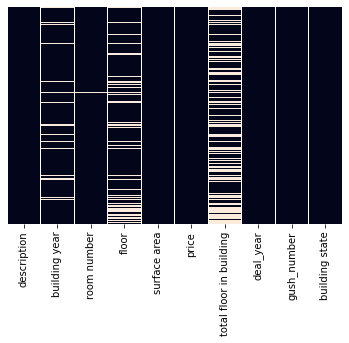

In [58]:
sns.heatmap(country_deals_cop3.isnull(),yticklabels=False,cbar=False)

Take care of the nan values. either remove them or replace them accordingly.

1. building year
15007 values are missing
2. room number
91 values are missing
3. surface area
635 values are missing
4. floor and total flor in the buiding
too many values are missing from these features, better remove them.

,total floor in building,building year
building state,,
new,7.0,2017.0
old,4.0,1970.0
unknown,2.0,NaN


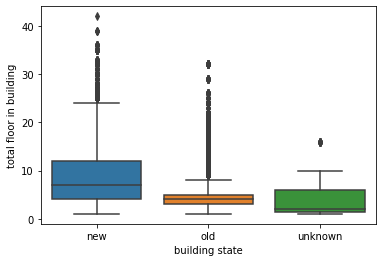

In [67]:
sns.boxplot(x= 'building state', y ='total floor in building', data=country_deals_cop3 )
country_deals_cop3.groupby(['building state']).median()[['total floor in building', 'building year']]

Replace missing values of [building year] 

whenever I have information on the total number of floor in the building.

- For older building (mean = 1974), the median total floor is 4.
- For newer building (mean = 2015), the median total floor is 6.

In [68]:
for row, column in country_deals_cop3.iterrows():
    if np.isnan(country_deals_cop3.loc[row, 'building year']) and country_deals_cop3.loc[row,'total floor in building'] <= 4:
        country_deals.loc[row, 'building year'] = 1974
    elif np.isnan(country_deals_cop3.loc[row, 'building year']) and country_deals_cop3.loc[row,'total floor in building'] > 4:
        country_deals_cop3.loc[row, 'building year'] = 2015     

In [75]:
country_deals_cop3.reset_index(inplace=True)

replacing missing values in surface area and room number that tends to be corelated

In [81]:
country_deals_cop4 = country_deals_cop3.copy()
country_deals_cop4.set_index('surface area', inplace=True)
area = []
for row, value in country_deals_cop4.iterrows():
    if 0< row < 50:
        area.append('A < 50')
    elif 49< row < 100:
        area.append('50 < A < 100')
    elif 99< row < 150:
        area.append('100 < A < 150')  
    elif 149 < row < 200:
        area.append('150 < A < 200')
    elif row > 199:
        area.append('A > 200')
    else:
        area.append('unknown')

country_deals_cop4.reset_index(inplace=True)
country_deals_cop4['area bins'] = area

country_deals_cop4

,surface area,description,building year,room number,floor,price,total floor in building,deal_year,gush_number,building state,area bins
0,45.0,appartment,2003.0,1.0,ראשונה,4130000,NaN,2016,19688,new,A < 50
1,82.1,appartment,1970.0,3.0,ראשונה,1690000,2.0,2019,29536,old,50 < A < 100
2,115.0,appartment,1970.0,4.0,קרקע,1985000,2.0,2019,29536,old,100 < A < 150
3,110.0,appartment,1970.0,3.0,NaN,3333000,NaN,2018,29524,old,100 < A < 150
4,76.1,appartment,1970.0,3.0,שניה,1480000,2.0,2018,29536,old,50 < A < 100
...,...,...,...,...,...,...,...,...,...,...,...
218142,100.0,single ground house,1987.0,4.0,ראשונה,900000,NaN,2015,19255,old,100 < A < 150
218143,127.0,single ground house,1992.0,5.0,NaN,752000,NaN,2015,19255,old,100 < A < 150
218144,130.0,single ground house,1998.0,6.0,NaN,725000,NaN,2010,19255,old,100 < A < 150
218145,76.0,single ground house,1992.0,4.0,NaN,520000,NaN,2008,19255,old,50 < A < 100


,room number,surface area
area bins,,
100 < A < 150,5.0,118.40
150 < A < 200,6.0,165.00
50 < A < 100,3.0,75.67
A < 50,2.0,42.79
A > 200,6.0,242.00
unknown,1.0,NaN


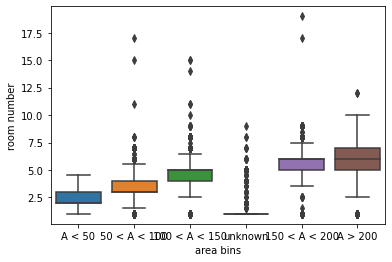

In [83]:
sns.boxplot(x= 'area bins', y='room number', data=country_deals_cop4)
country_deals_cop4.groupby(['area bins']).median()[['room number', 'surface area']]

In [112]:
country_deals_cop5 = country_deals_cop4.copy()

for row, column in country_deals_cop5.iterrows():
    if np.isnan(country_deals_cop5.loc[row, 'surface area']):
        if 0 < country_deals_cop5.loc[row,'room number'] <= 2:
            country_deals_cop5.loc[row, 'surface area'] = 42
        elif 2 < country_deals_cop5.loc[row,'room number'] < 4:
            country_deals_cop5.loc[row, 'surface area'] = 75
        elif 4 <= country_deals_cop5.loc[row,'room number'] <= 5:
            country_deals_cop5.loc[row, 'surface area'] = 118 
        elif country_deals_cop5.loc[row,'room number'] > 5:
            country_deals_cop5.loc[row, 'surface area'] = 165    
    



In [113]:
country_deals_cop6 = country_deals_cop5.copy()

for row, column in country_deals_cop5.iterrows():
    if np.isnan(country_deals_cop6.loc[row, 'room number']):
        if country_deals_cop6.loc[row,'area bins'] == 'A < 50':
            country_deals_cop6.loc[row, 'room number'] = 2
        elif country_deals_cop6.loc[row,'area bins'] == '50 < A < 100':
            country_deals_cop6.loc[row, 'room number'] = 3
        elif country_deals_cop6.loc[row,'area bins'] == '100 < A < 150':
            country_deals_cop6.loc[row, 'room number'] = 5
        elif country_deals_cop6.loc[row,'area bins'] == '150 < A < 200':
            country_deals_cop6.loc[row, 'room number'] = 6
        elif country_deals_cop6.loc[row,'area bins'] == 'A > 200':
            country_deals_cop6.loc[row, 'room number'] = 6

In [115]:
country_deals_cop6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218147 entries, 0 to 218146
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   surface area             218073 non-null  float64
 1   description              218147 non-null  object 
 2   building year            202713 non-null  float64
 3   room number              218073 non-null  float64
 4   floor                    174997 non-null  object 
 5   price                    218147 non-null  int32  
 6   total floor in building  131433 non-null  float64
 7   deal_year                218147 non-null  int32  
 8   gush_number              218147 non-null  int32  
 9   building state           218147 non-null  object 
 10  area bins                218147 non-null  object 
dtypes: float64(4), int32(3), object(4)
memory usage: 15.8+ MB


Most of the data is from 2017 and later. Hence I will use only the data from 2017 to 2020.

In [168]:
recent_deals = country_deals_cop6.loc[country_deals_cop6['deal_year']>2016]
recent_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207605 entries, 1 to 218141
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   surface area             207534 non-null  float64
 1   description              207605 non-null  object 
 2   building year            192289 non-null  float64
 3   room number              207534 non-null  float64
 4   floor                    169480 non-null  object 
 5   price                    207605 non-null  int32  
 6   total floor in building  129369 non-null  float64
 7   deal_year                207605 non-null  int32  
 8   gush_number              207605 non-null  int32  
 9   building state           207605 non-null  object 
 10  area bins                207605 non-null  object 
dtypes: float64(4), int32(3), object(4)
memory usage: 16.6+ MB


Two options to deal with missing values in the building year and surface area column.
1. To replace them by the median year (1997)
2. To remove them

For now, I will remove them as I think that this column has a significant impact on the price of the aset. I don't want to introduce too many incertainties in the model.





In [169]:
recent_deals.describe()

,surface area,building year,room number,price,total floor in building,deal_year,gush_number
count,207534.000000,192289.000000,207534.000000,2.076050e+05,129369.000000,207605.000000,207605.000000
mean,103.311220,1991.813390,3.966979,1.753416e+06,5.772341,2018.794639,14362.575588
std,156.561584,46.434313,1.138789,2.764037e+06,5.384781,0.791343,19201.253413
min,20.020000,0.000000,1.000000,5.000000e+04,1.000000,2017.000000,187.000000
25%,69.700000,1970.000000,3.000000,1.033000e+06,3.000000,2018.000000,6145.000000
50%,96.000000,1997.000000,4.000000,1.485000e+06,4.000000,2019.000000,7594.000000
75%,121.300000,2017.000000,5.000000,2.098000e+06,7.000000,2019.000000,16662.000000
max,34153.000000,2023.000000,19.000000,3.800000e+08,42.000000,2048.000000,400505.000000


In [170]:
recent_deal_copy1 = recent_deals.copy()
recent_deal_copy1.dropna(axis = 0, subset = ['building year', 'surface area'], inplace=True)
recent_deal_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192275 entries, 1 to 218141
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   surface area             192275 non-null  float64
 1   description              192275 non-null  object 
 2   building year            192275 non-null  float64
 3   room number              192275 non-null  float64
 4   floor                    167748 non-null  object 
 5   price                    192275 non-null  int32  
 6   total floor in building  129239 non-null  float64
 7   deal_year                192275 non-null  int32  
 8   gush_number              192275 non-null  int32  
 9   building state           192275 non-null  object 
 10  area bins                192275 non-null  object 
dtypes: float64(4), int32(3), object(4)
memory usage: 15.4+ MB


In [171]:
recent_deal_copy2 = recent_deal_copy1.drop(columns = ['total floor in building', 'floor'])
recent_deal_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192275 entries, 1 to 218141
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   surface area    192275 non-null  float64
 1   description     192275 non-null  object 
 2   building year   192275 non-null  float64
 3   room number     192275 non-null  float64
 4   price           192275 non-null  int32  
 5   deal_year       192275 non-null  int32  
 6   gush_number     192275 non-null  int32  
 7   building state  192275 non-null  object 
 8   area bins       192275 non-null  object 
dtypes: float64(3), int32(3), object(3)
memory usage: 12.5+ MB


C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

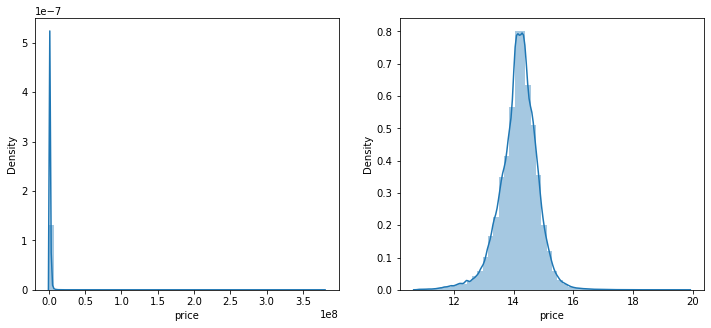

In [165]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.distplot(recent_deal_copy3['price'], ax=axes[0])
sns.distplot(np.log1p(recent_deal_copy3['price']), ax=axes[1])

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='surface area', ylabel='Density'>

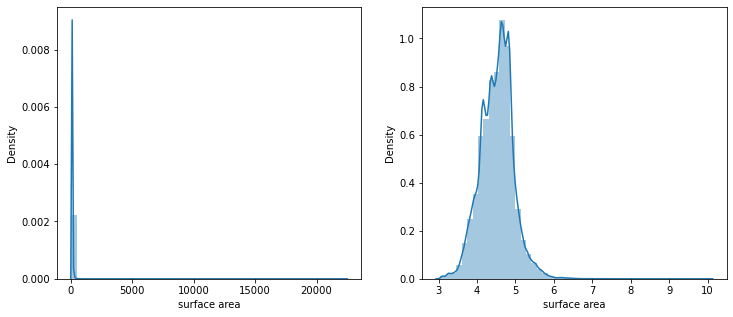

In [144]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.distplot(recent_deal_copy3['surface area'], ax=axes[0])
sns.distplot(np.log1p(recent_deal_copy3['surface area']), ax=axes[1])
# country_deals['log_surface area'] = np.log1p(country_deals['surface area'])
# sns.distplot(country_deals['log_surface area'])

Completing the unknown value of the building state.

In [172]:
recent_deal_copy4 = recent_deal_copy3.copy()
recent_deal_copy4.set_index('building year', inplace=True)
buildind_state = []
for row, value in recent_deal_copy4.iterrows():
    if row <= 2000:
        buildind_state.append('old')
    elif row > 2000:
        buildind_state.append('new')
    else:
        buildind_state.append('unknown')
recent_deal_copy4.reset_index(inplace=True)
recent_deal_copy4['building state'] = buildind_state

C:\Users\majac\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\majac\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='building state', ylabel='count'>

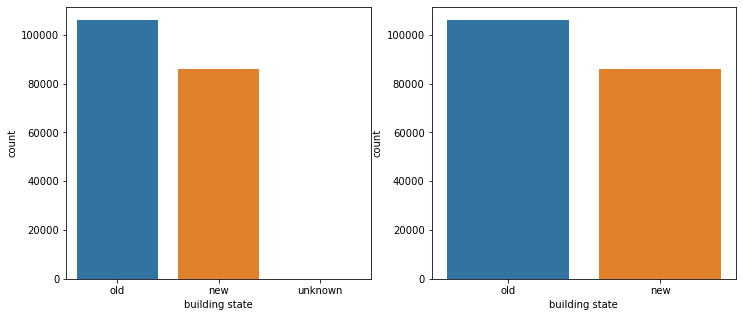

In [151]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot('building state',  data=recent_deal_copy3, ax=axes[0])
sns.countplot('building state',  data=recent_deal_copy4, ax=axes[1])

C:\Users\majac\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 20000000.0)

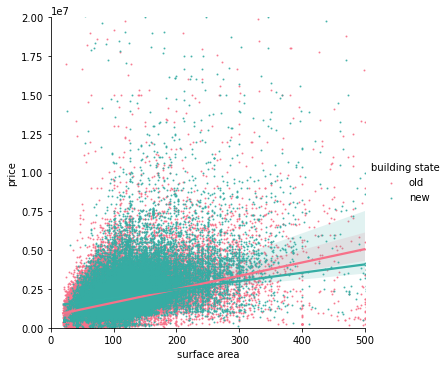

In [155]:
sns.lmplot( 'surface area', 'price',data=recent_deal_copy4, scatter_kws={"s": 1}, hue = 'building state', fit_reg=True, palette="husl")
plt.xlim(0, 500)
plt.ylim(0, 20000000)

In [199]:
recent_deal_copy4

,building year,surface area,description,room number,price,deal_year,gush_number,building state,area bins
0,1970.0,82.1,appartment,3.0,1690000,2019,29536,old,50 < A < 100
1,1970.0,115.0,appartment,4.0,1985000,2019,29536,old,100 < A < 150
2,1970.0,110.0,appartment,3.0,3333000,2018,29524,old,100 < A < 150
3,1970.0,76.1,appartment,3.0,1480000,2018,29536,old,50 < A < 100
4,1990.0,127.8,appartment,5.0,1900000,2018,29536,old,100 < A < 150
...,...,...,...,...,...,...,...,...,...
192270,1992.0,210.0,single ground house,5.0,1860000,2017,19161,old,A > 200
192271,2000.0,200.0,single ground house,8.0,2065000,2017,19042,old,A > 200
192272,1998.0,89.0,single ground house,3.0,870000,2019,19255,old,50 < A < 100
192273,1998.0,101.0,single ground house,5.0,925000,2018,19255,old,100 < A < 150


In [200]:
recent_deal_copy4.to_csv(r'C:\Users\majac\Desktop\Projects\Real-estate-israel\recent_deal.csv')

In [188]:
file_stop_gush = r'C:\Users\majac\Desktop\JohnBriceProject\PublicTransport\GushAndBus_stopFinal.csv'
rest_gush = r'C:\Users\majac\Desktop\JohnBriceProject\intermediate csv files\restaurant.csv'
school_gush = r'C:\Users\majac\Desktop\JohnBriceProject\intermediate csv files\school_education_in_gush2.csv'
city_gush1 = r'C:\Users\majac\Desktop\JohnBriceProject\intermediate csv files\city_names _ID.csv'
city_gush2 = r'C:\Users\majac\Desktop\JohnBriceProject\intermediate csv files\city_names _IDSTRIP.csv'
loc_id_gush = r'C:\Users\majac\Desktop\JohnBriceProject\intermediate csv files\locID_gushNUM.csv'

In [177]:
bus_gush = pd.read_csv(file_stop_gush)
### removing not found row at index 6930
bus_gush2 = bus_gush.drop(axis=0, index=6930)
bus_gush2.columns = ['gush_number', 'number of bus stops']
bus_gush2['gush_number'] = bus_gush2['gush_number'].astype(int)
df_nadlan = recent_deal_copy4.merge(bus_gush2, on ='gush_number',how ='left')
df_nadlan

,building year,surface area,description,room number,price,deal_year,gush_number,building state,area bins,number of bus stops
0,1970.0,82.1,appartment,3.0,1690000,2019,29536,old,50 < A < 100,10.0
1,1970.0,115.0,appartment,4.0,1985000,2019,29536,old,100 < A < 150,10.0
2,1970.0,110.0,appartment,3.0,3333000,2018,29524,old,100 < A < 150,1.0
3,1970.0,76.1,appartment,3.0,1480000,2018,29536,old,50 < A < 100,10.0
4,1990.0,127.8,appartment,5.0,1900000,2018,29536,old,100 < A < 150,10.0
...,...,...,...,...,...,...,...,...,...,...
192270,1992.0,210.0,single ground house,5.0,1860000,2017,19161,old,A > 200,NaN
192271,2000.0,200.0,single ground house,8.0,2065000,2017,19042,old,A > 200,1.0
192272,1998.0,89.0,single ground house,3.0,870000,2019,19255,old,50 < A < 100,1.0
192273,1998.0,101.0,single ground house,5.0,925000,2018,19255,old,100 < A < 150,1.0


In [180]:
restaurant_df = pd.read_csv(rest_gush)
restaurant_df2 = restaurant_df.drop(columns = ['Unnamed: 0', 'lat_lon'])
restaurant_df2['gush_number'] = restaurant_df2['gush_number'].astype('int')
cop1_df_nadlan = df_nadlan.merge(restaurant_df2, on ='gush_number',how ='left')
cop1_df_nadlan

,building year,surface area,description,room number,price,deal_year,gush_number,building state,area bins,number of bus stops,restaurant_number
0,1970.0,82.1,appartment,3.0,1690000,2019,29536,old,50 < A < 100,10.0,40.0
1,1970.0,115.0,appartment,4.0,1985000,2019,29536,old,100 < A < 150,10.0,40.0
2,1970.0,110.0,appartment,3.0,3333000,2018,29524,old,100 < A < 150,1.0,50.0
3,1970.0,76.1,appartment,3.0,1480000,2018,29536,old,50 < A < 100,10.0,40.0
4,1990.0,127.8,appartment,5.0,1900000,2018,29536,old,100 < A < 150,10.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
192270,1992.0,210.0,single ground house,5.0,1860000,2017,19161,old,A > 200,NaN,36.0
192271,2000.0,200.0,single ground house,8.0,2065000,2017,19042,old,A > 200,1.0,55.0
192272,1998.0,89.0,single ground house,3.0,870000,2019,19255,old,50 < A < 100,1.0,11.0
192273,1998.0,101.0,single ground house,5.0,925000,2018,19255,old,100 < A < 150,1.0,11.0


In [182]:
school_df = pd.read_csv(school_gush)
school_df['gush_number'] = school_df['gush_number'].astype('int')
cop2_df_nadlan = cop1_df_nadlan.merge(school_df, on ='gush_number',how ='left')
cop2_df_nadlan

,building year,surface area,description,room number,price,deal_year,gush_number,building state,area bins,number of bus stops,restaurant_number,school_gan,education_type,ethnicity,religious or not
0,1970.0,82.1,appartment,3.0,1690000,2019,29536,old,50 < A < 100,10.0,40.0,2.0,H,J,4.0
1,1970.0,115.0,appartment,4.0,1985000,2019,29536,old,100 < A < 150,10.0,40.0,2.0,H,J,4.0
2,1970.0,110.0,appartment,3.0,3333000,2018,29524,old,100 < A < 150,1.0,50.0,2.0,A,A,1.0
3,1970.0,76.1,appartment,3.0,1480000,2018,29536,old,50 < A < 100,10.0,40.0,2.0,H,J,4.0
4,1990.0,127.8,appartment,5.0,1900000,2018,29536,old,100 < A < 150,10.0,40.0,2.0,H,J,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192270,1992.0,210.0,single ground house,5.0,1860000,2017,19161,old,A > 200,NaN,36.0,NaN,NaN,NaN,NaN
192271,2000.0,200.0,single ground house,8.0,2065000,2017,19042,old,A > 200,1.0,55.0,1.0,M,J,2.0
192272,1998.0,89.0,single ground house,3.0,870000,2019,19255,old,50 < A < 100,1.0,11.0,3.0,M,J,2.0
192273,1998.0,101.0,single ground house,5.0,925000,2018,19255,old,100 < A < 150,1.0,11.0,3.0,M,J,2.0


In [191]:
id_gush_df = pd.read_csv(loc_id_gush)
id_gush_df['gush_number'] = id_gush_df['gush_number'].astype('int')
cop3_df_nadlan = cop2_df_nadlan.merge(id_gush_df, on ='gush_number',how ='left')
cop3_df_nadlan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192421 entries, 0 to 192420
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   building year        192421 non-null  float64
 1   surface area         192421 non-null  float64
 2   description          192421 non-null  object 
 3   room number          192421 non-null  float64
 4   price                192421 non-null  int32  
 5   deal_year            192421 non-null  int32  
 6   gush_number          192421 non-null  int32  
 7   building state       192421 non-null  object 
 8   area bins            192421 non-null  object 
 9   number of bus stops  163158 non-null  float64
 10  restaurant_number    185683 non-null  float64
 11  school_gan           129677 non-null  float64
 12  education_type       129677 non-null  object 
 13  ethnicity            129677 non-null  object 
 14  religious or not     129677 non-null  float64
 15  Locality ID      

In [198]:
id_city = pd.read_csv(city_gush1)
id_city.columns = ['Locality ID', 'city_name']
cop4_df_nadlan = cop3_df_nadlan.merge(id_city, on ='Locality ID',how ='left')
cop4_df_nadlan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192421 entries, 0 to 192420
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   building year        192421 non-null  float64
 1   surface area         192421 non-null  float64
 2   description          192421 non-null  object 
 3   room number          192421 non-null  float64
 4   price                192421 non-null  int32  
 5   deal_year            192421 non-null  int32  
 6   gush_number          192421 non-null  int32  
 7   building state       192421 non-null  object 
 8   area bins            192421 non-null  object 
 9   number of bus stops  163158 non-null  float64
 10  restaurant_number    185683 non-null  float64
 11  school_gan           129677 non-null  float64
 12  education_type       129677 non-null  object 
 13  ethnicity            129677 non-null  object 
 14  religious or not     129677 non-null  float64
 15  Locality ID      

In [201]:
cop4_df_nadlan.to_csv(r'C:\Users\majac\Desktop\Projects\Real-estate-israel\DealandGushAtribute.csv')